# Batik Pattern Inspiration from the Gray-Scott Model

Importing the libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import time
import matplotlib.animation as animation

Here we define a matrix that is used to perform a 5-point stencil approximation.

In [3]:
def laplacian(N):
    """
    Create a sparse matrix to calculate the laplacian
        N = grid size
    """
    e = np.ones(N**2)
    e2 = ([1]*(N-1)+[0])*N
    e3 = ([0]+[1]*(N-1))*N
    L = spdiags([-4*e,e2,e3,e,e],[0,-1,1,-N,N],N**2,N**2)
    return L

We started off with full chemical A everywhere and a small region of chemical B in the center.

In [4]:
def initialize(N):
    """
    Setting up the initial condition
        N = grid size
    """
    N2, r = np.int64(N/2), 16

    # We start with every grid cell that has a lot of chemical A
    # and no chemical B except at the small region in the center
    A = np.ones((N, N))
    B = np.zeros((N, N))

    B[N2-r:N2+r, N2-r:N2+r] = 1.0
    
    A = A.reshape((N*N))
    B = B.reshape((N*N))
    
    return A, B

We define the update function which is the discretized form of the Gray-Scott model.

In [5]:
def update(A, B, dT, Da, Db, F, K, L):
    """
    Update the iteration via Euler method
        A = Concentration of chemical A
        B = Concentration of chemical B
        dT = Time step
        Da = Diffusion coefficient of chemical A
        Db = Diffusion coefficient of chemical B
        F = Feed rate
        K = Kill rate
        L = Sparse matrix for Laplacian
    """
    A = A + (Da*L.dot(A) - A*B*B + F*(1-A)) * dT
    B = B + (Db*L.dot(B) + A*B*B - (F+K)*B) * dT
    
    return A, B

We define a function to draw the pattern given the concentration of chemical A.

In [6]:
def drawPattern(A, ax=None):
    """
    Draw the pattern based on the chemical concentrations
        A = Concentration of chemical A
        ax = axis object
    """
    ax.pcolor(A.reshape((N,N)), cmap=plt.cm.RdBu)
    ax.set_axis_off()
#     ax.axis('tight')

## Pattern Growth Simulations

We perform simulations where we track the patterns as they are growing.
The simulation settings are divided into four:
1. The cell division pattern
2. The coral pattern
3. The spiral pattern
4. The Middle East pattern

### Cell Division Pattern Growth

Simulation time = 7.62723445892334 seconds


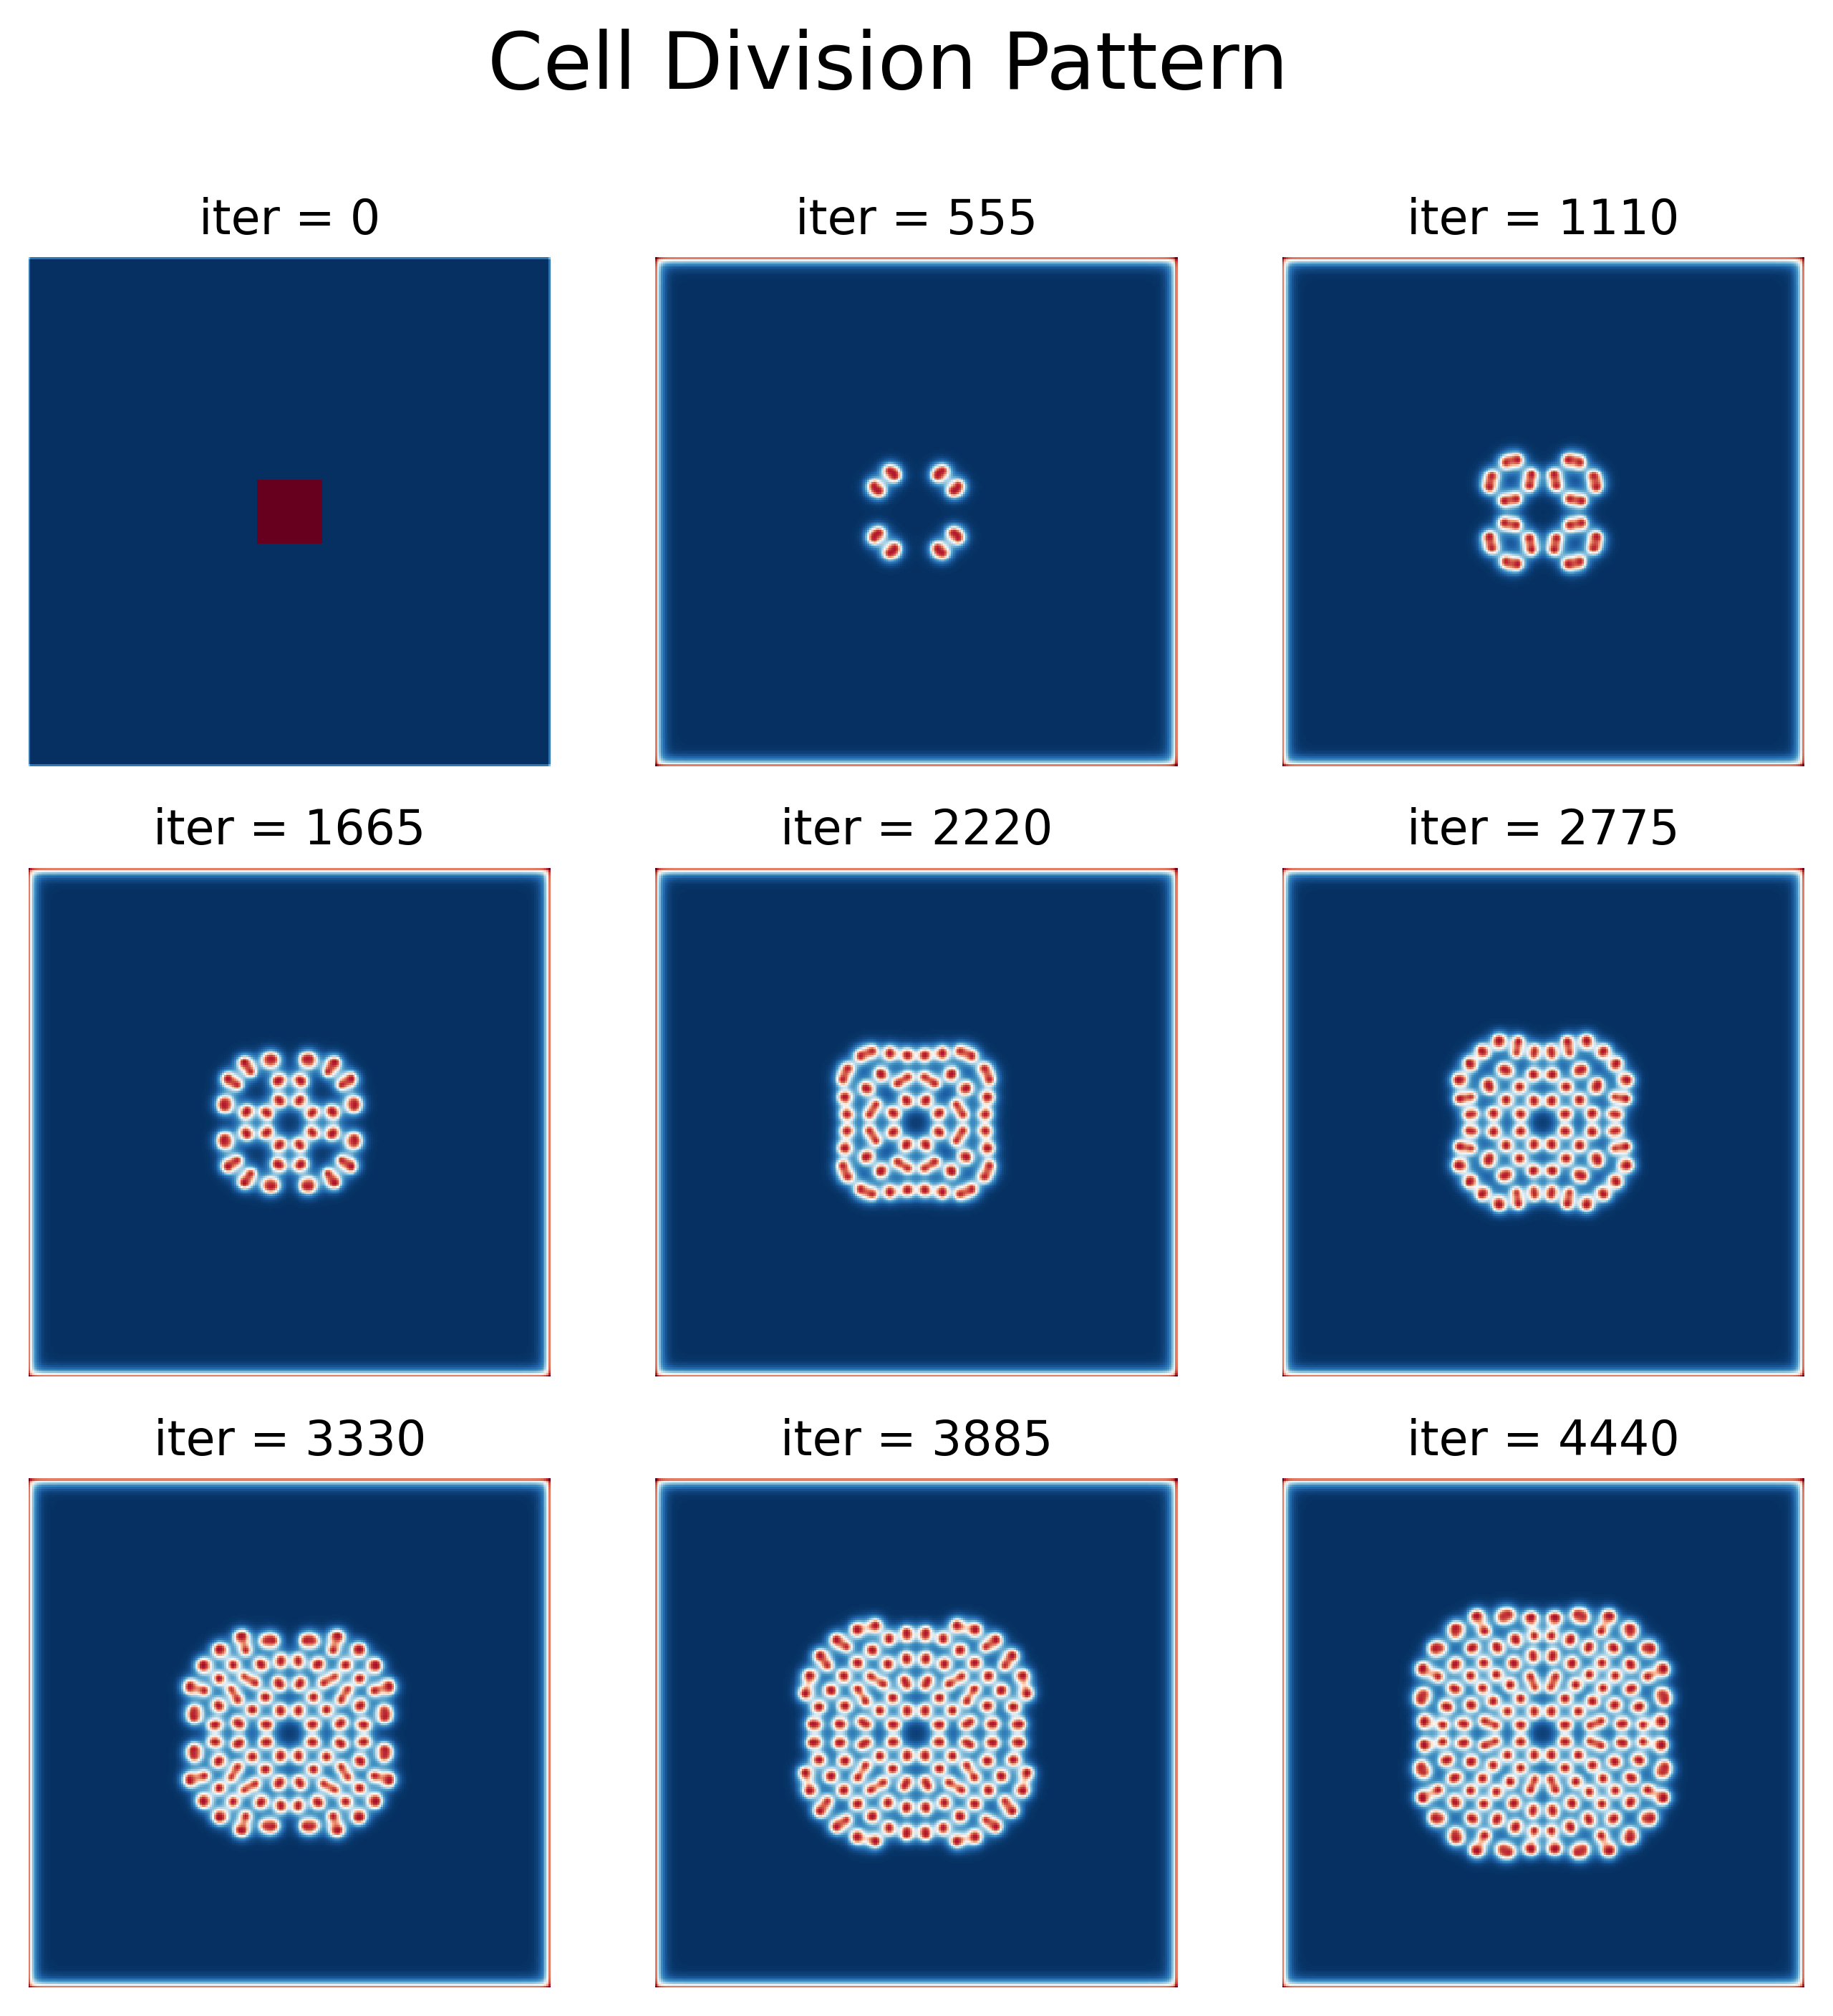

In [6]:
N = 256       # Grid size
T = 5000     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.14, 0.06, 0.035, 0.065  # Coefficients

fig, axes = plt.subplots(3,3, figsize=(8,8), dpi=400, facecolor='w', edgecolor='k')
step_plot = n // 9

# Simulation part
t1 = time.time()

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    
    # Plot at 9 different times
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        drawPattern(A, ax=ax)
        ax.set_title(f'iter = {i}')
    
fig.suptitle(f'Cell Division Pattern',fontsize=20)
t2 = time.time()

print(f'Simulation time = {t2-t1} seconds')

### Coral Pattern Simulation Growth

Simulation time = 8.289791107177734 seconds


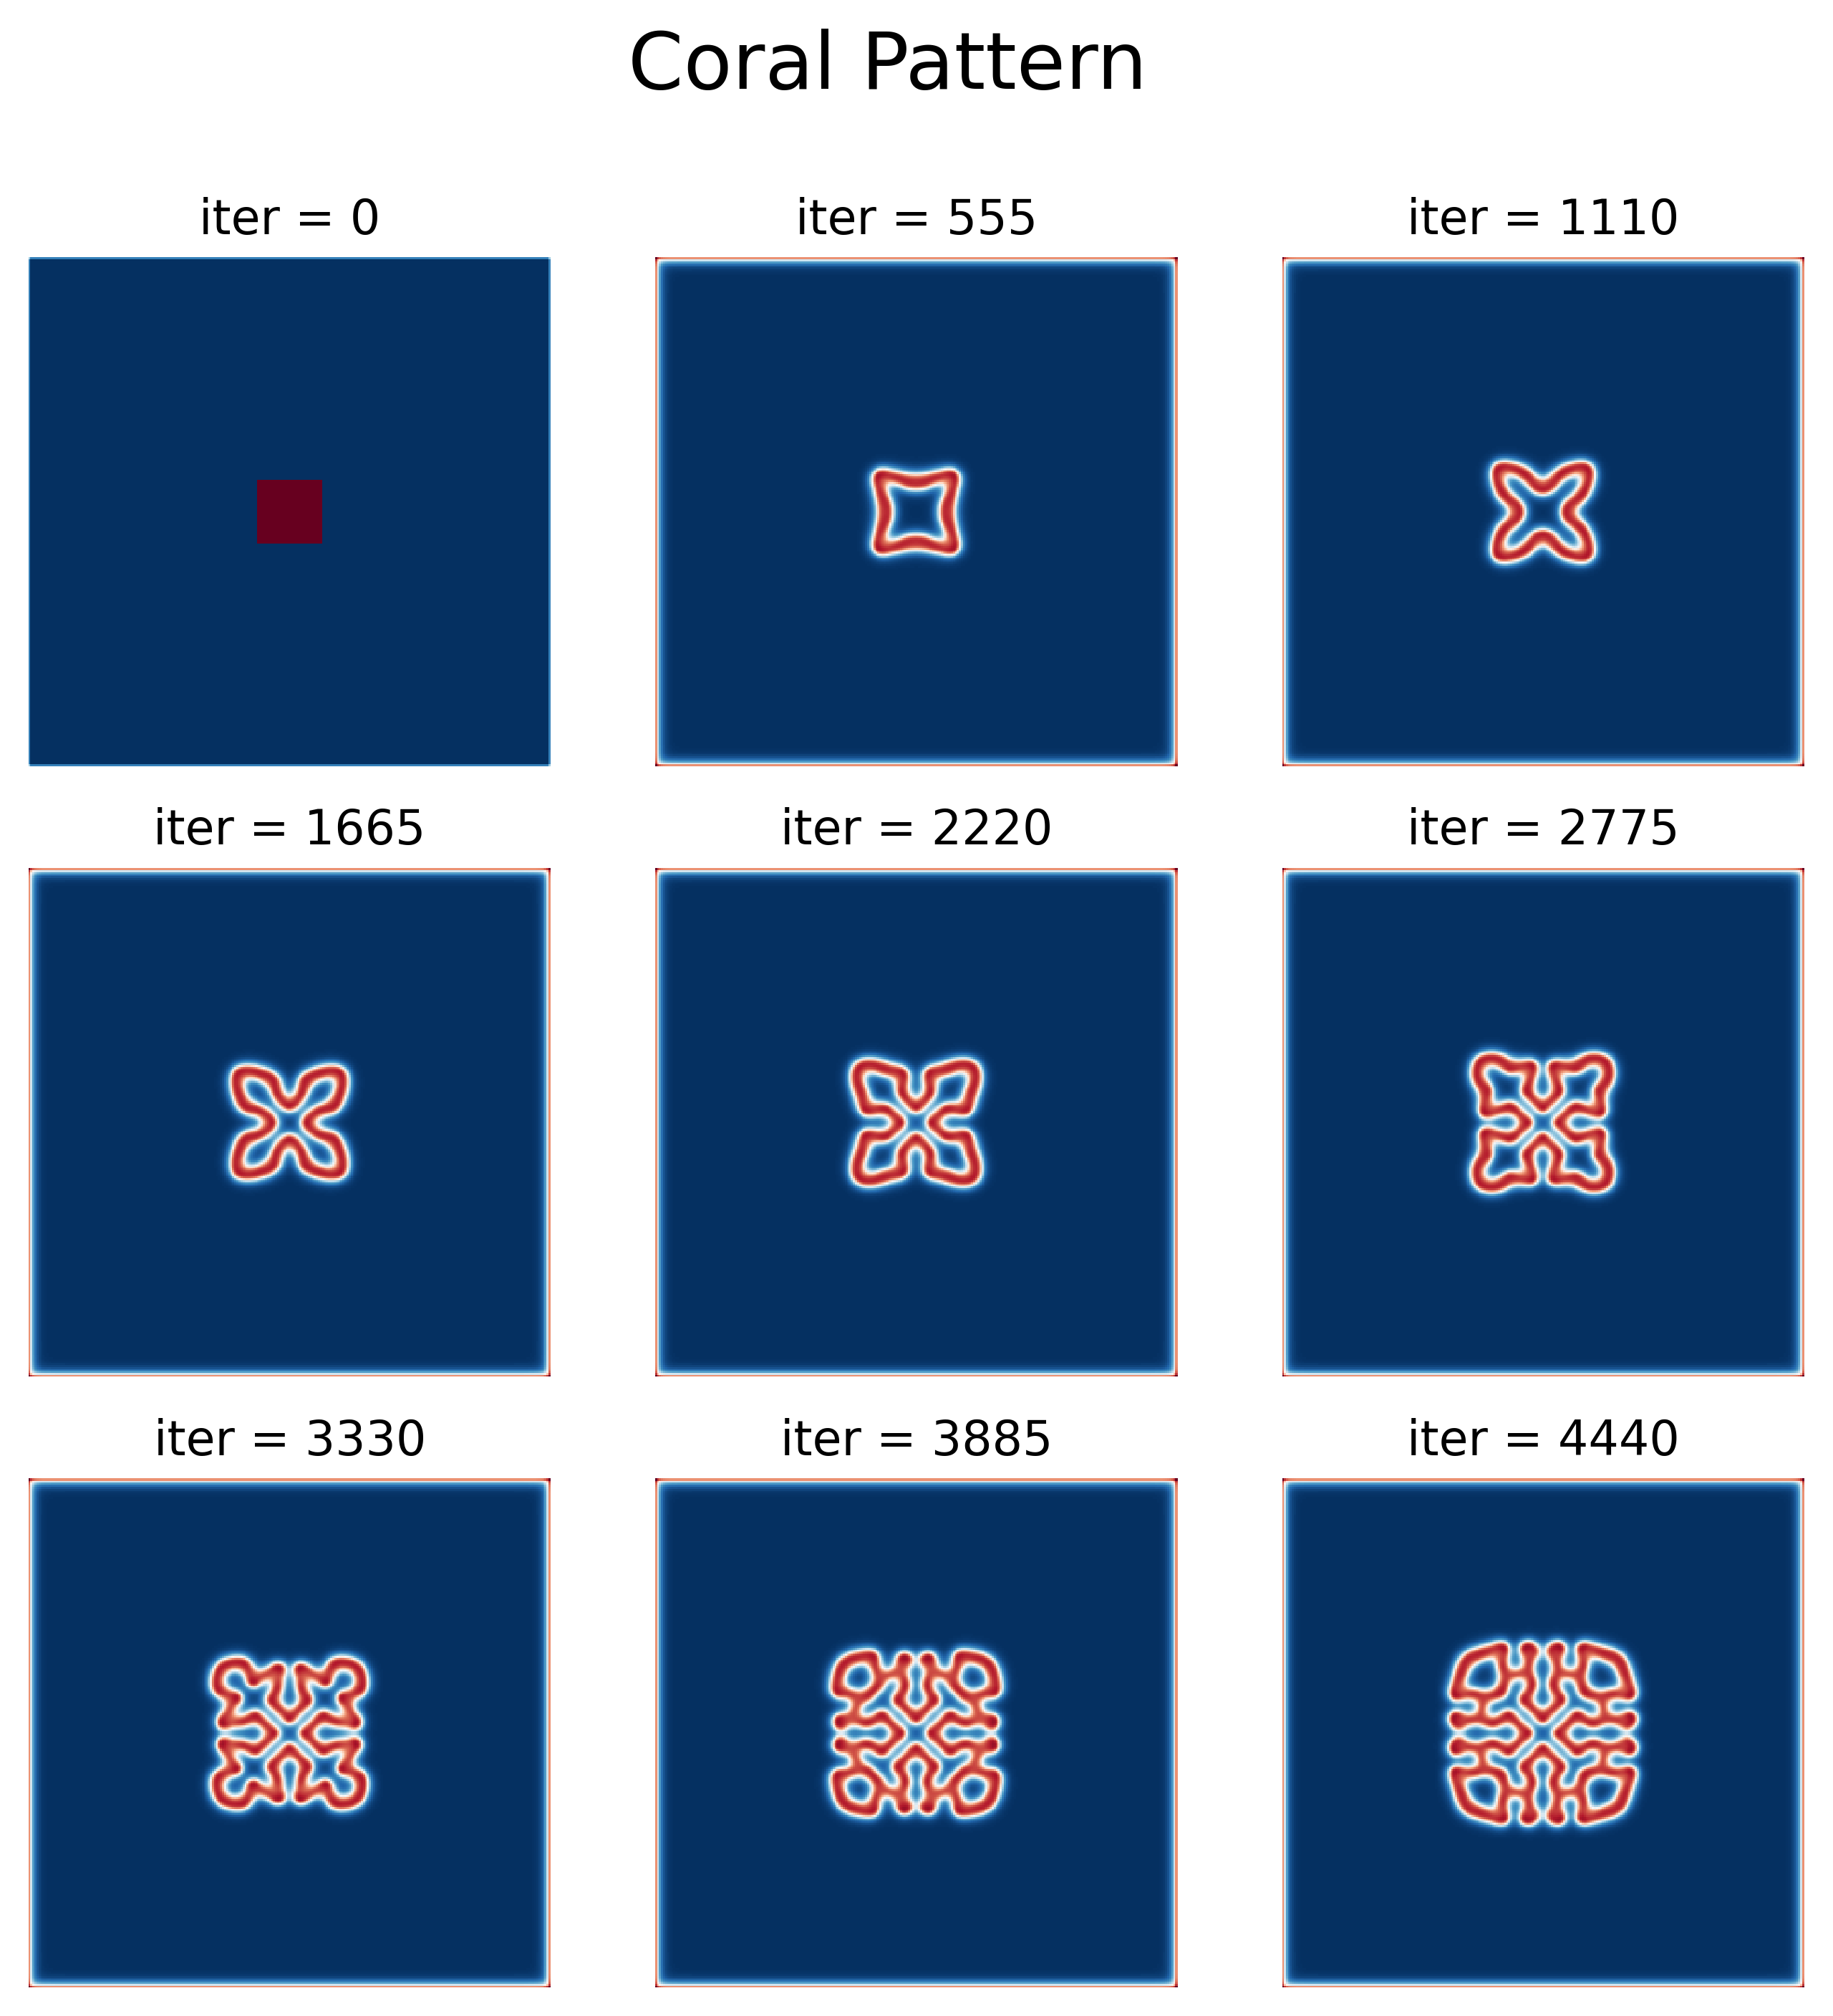

In [7]:
T = 5000     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.16, 0.08, 0.060, 0.062  # Coefficients

fig, axes = plt.subplots(3,3, figsize=(8,8), dpi=400, facecolor='w', edgecolor='k')
step_plot = n // 9

# Simulation part
t1 = time.time()

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    
    # Plot at 9 different times
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        drawPattern(A, ax=ax)
        ax.set_title(f'iter = {i}')
    
fig.suptitle(f'Coral Pattern',fontsize=20)
t2 = time.time()

print(f'Simulation time = {t2-t1} seconds')

### Spiral Simulation Growth

Simulation time = 10.638033628463745 seconds


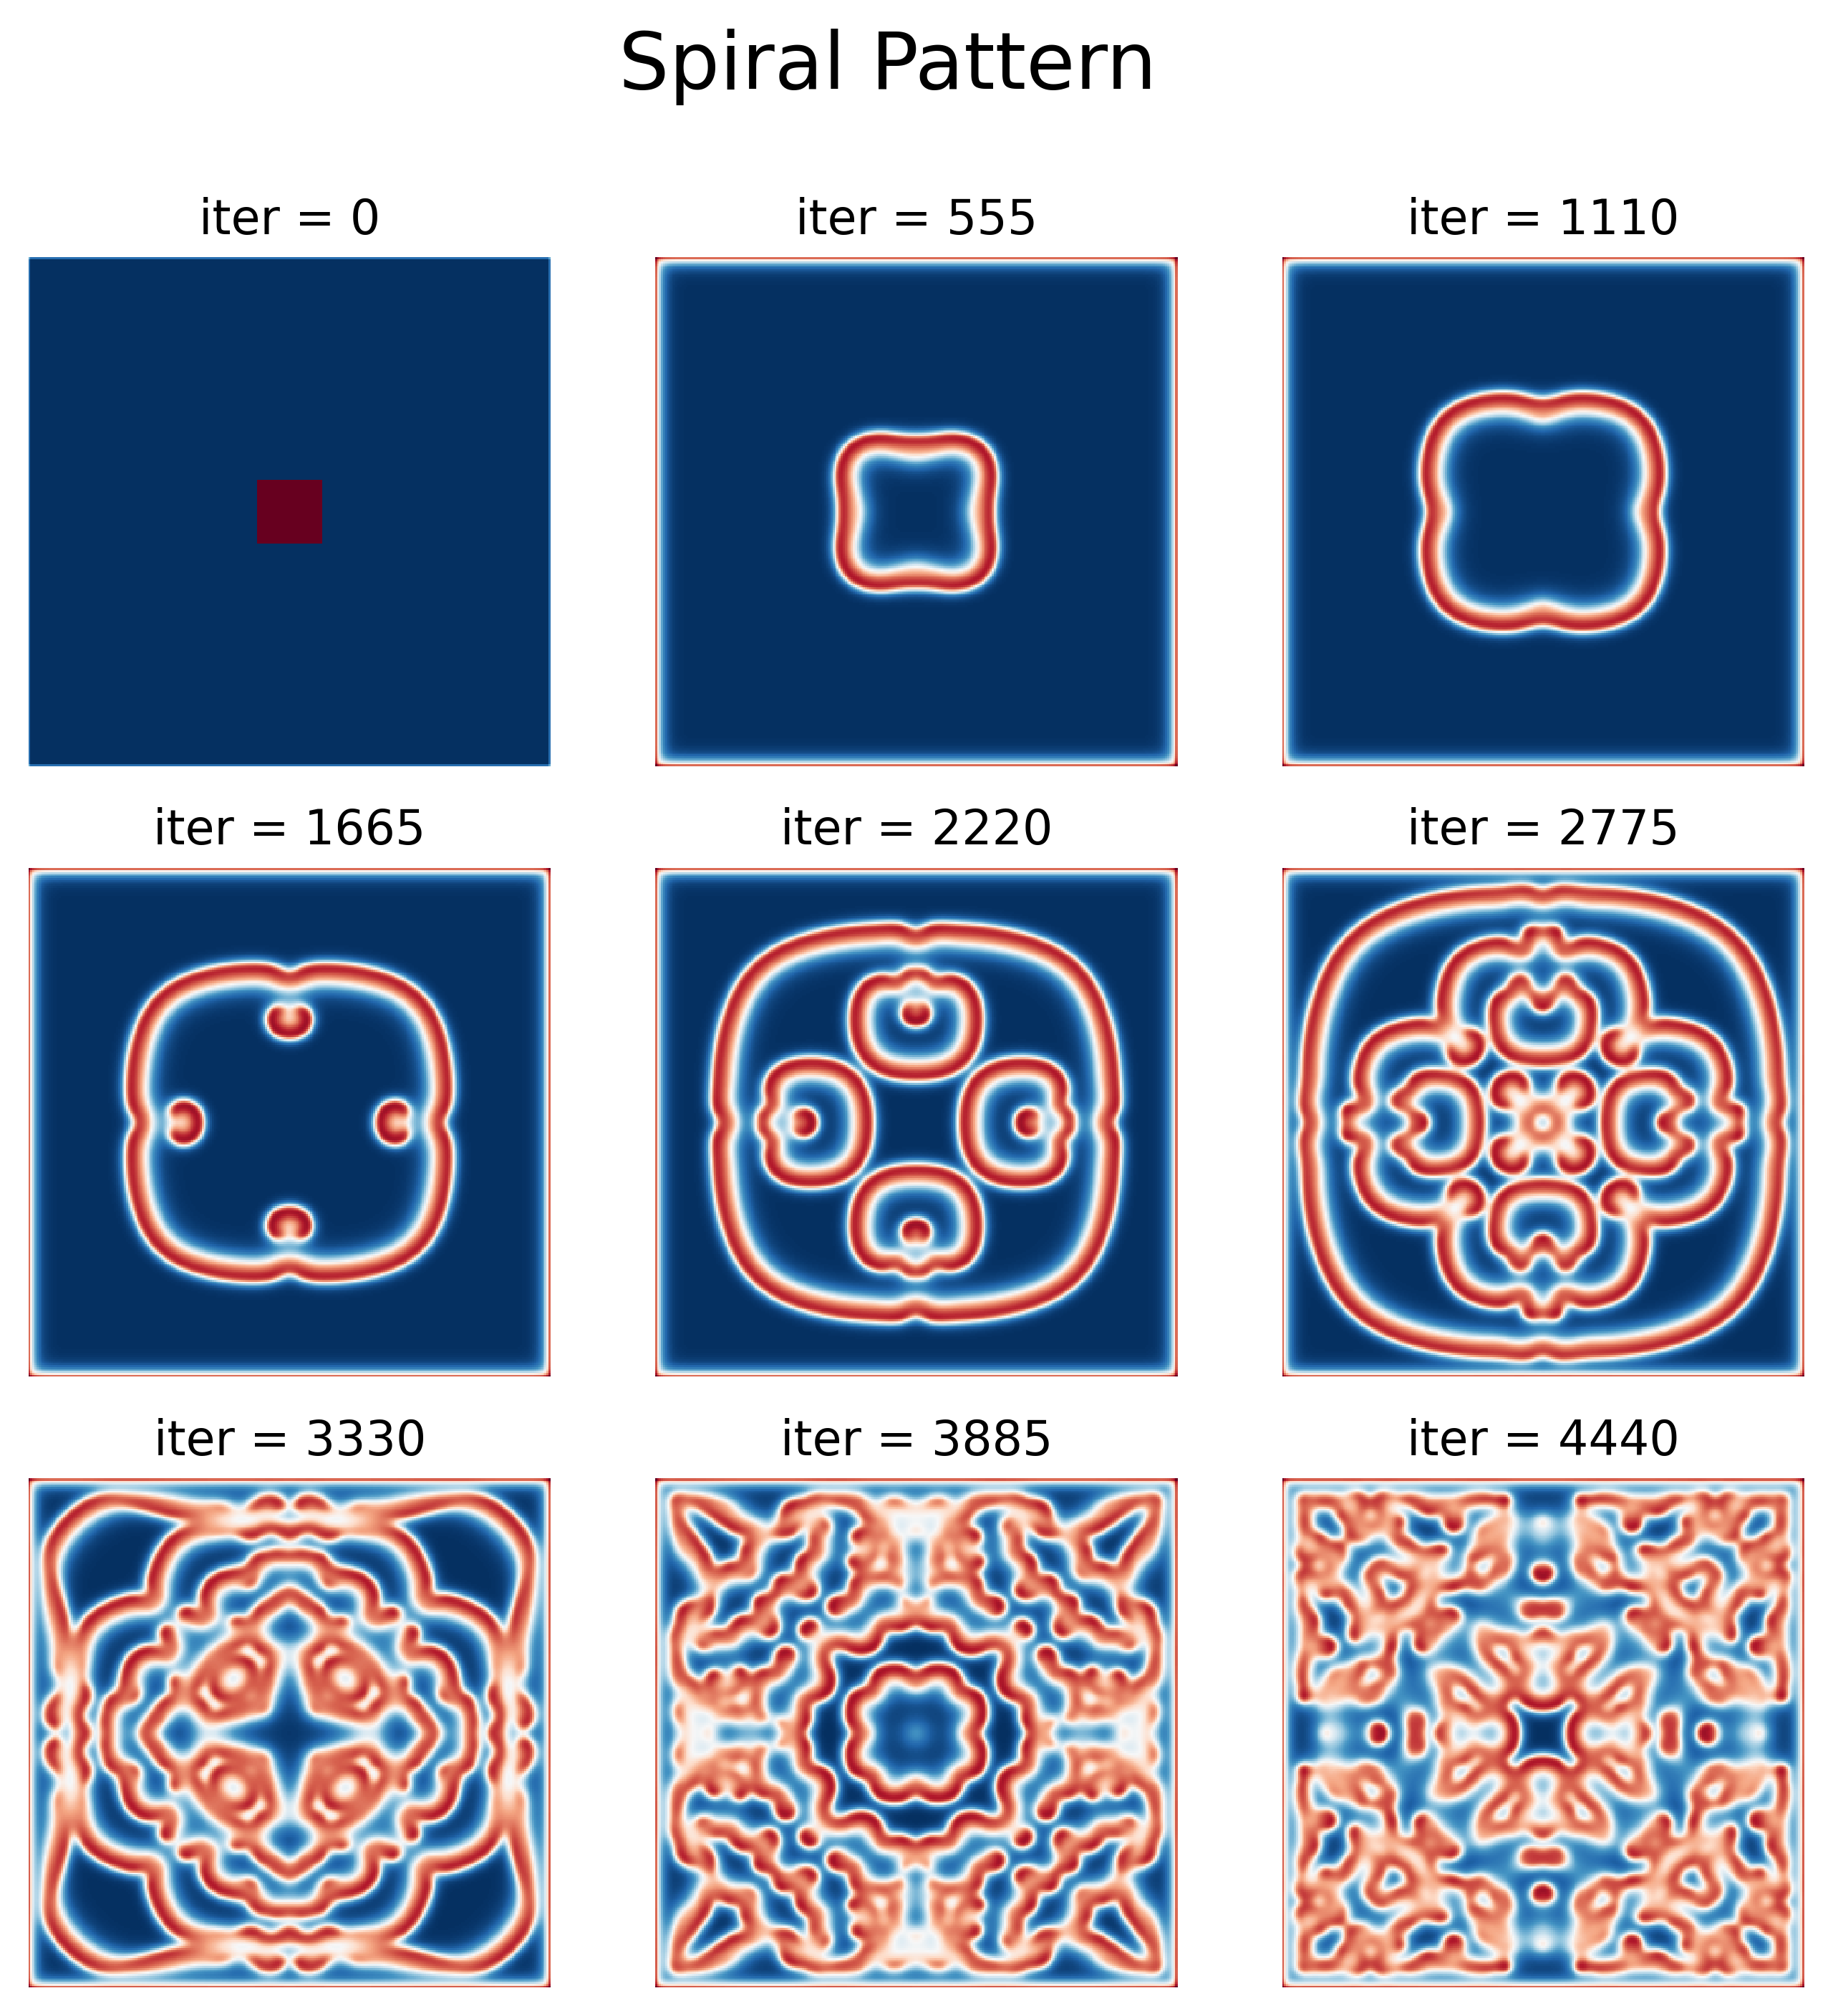

In [8]:
T = 5000     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.12, 0.08, 0.020, 0.050  # Coefficients

fig, axes = plt.subplots(3,3, figsize=(8,8), dpi=400, facecolor='w', edgecolor='k')
step_plot = n // 9

# Simulation part
t1 = time.time()

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    
    # Plot at 9 different times
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        drawPattern(A, ax=ax)
        ax.set_title(f'iter = {i}')
    
fig.suptitle(f'Spiral Pattern',fontsize=20)
t2 = time.time()

print(f'Simulation time = {t2-t1} seconds')

### Middle East Pattern Growth

Simulation time = 9.158462047576904 seconds


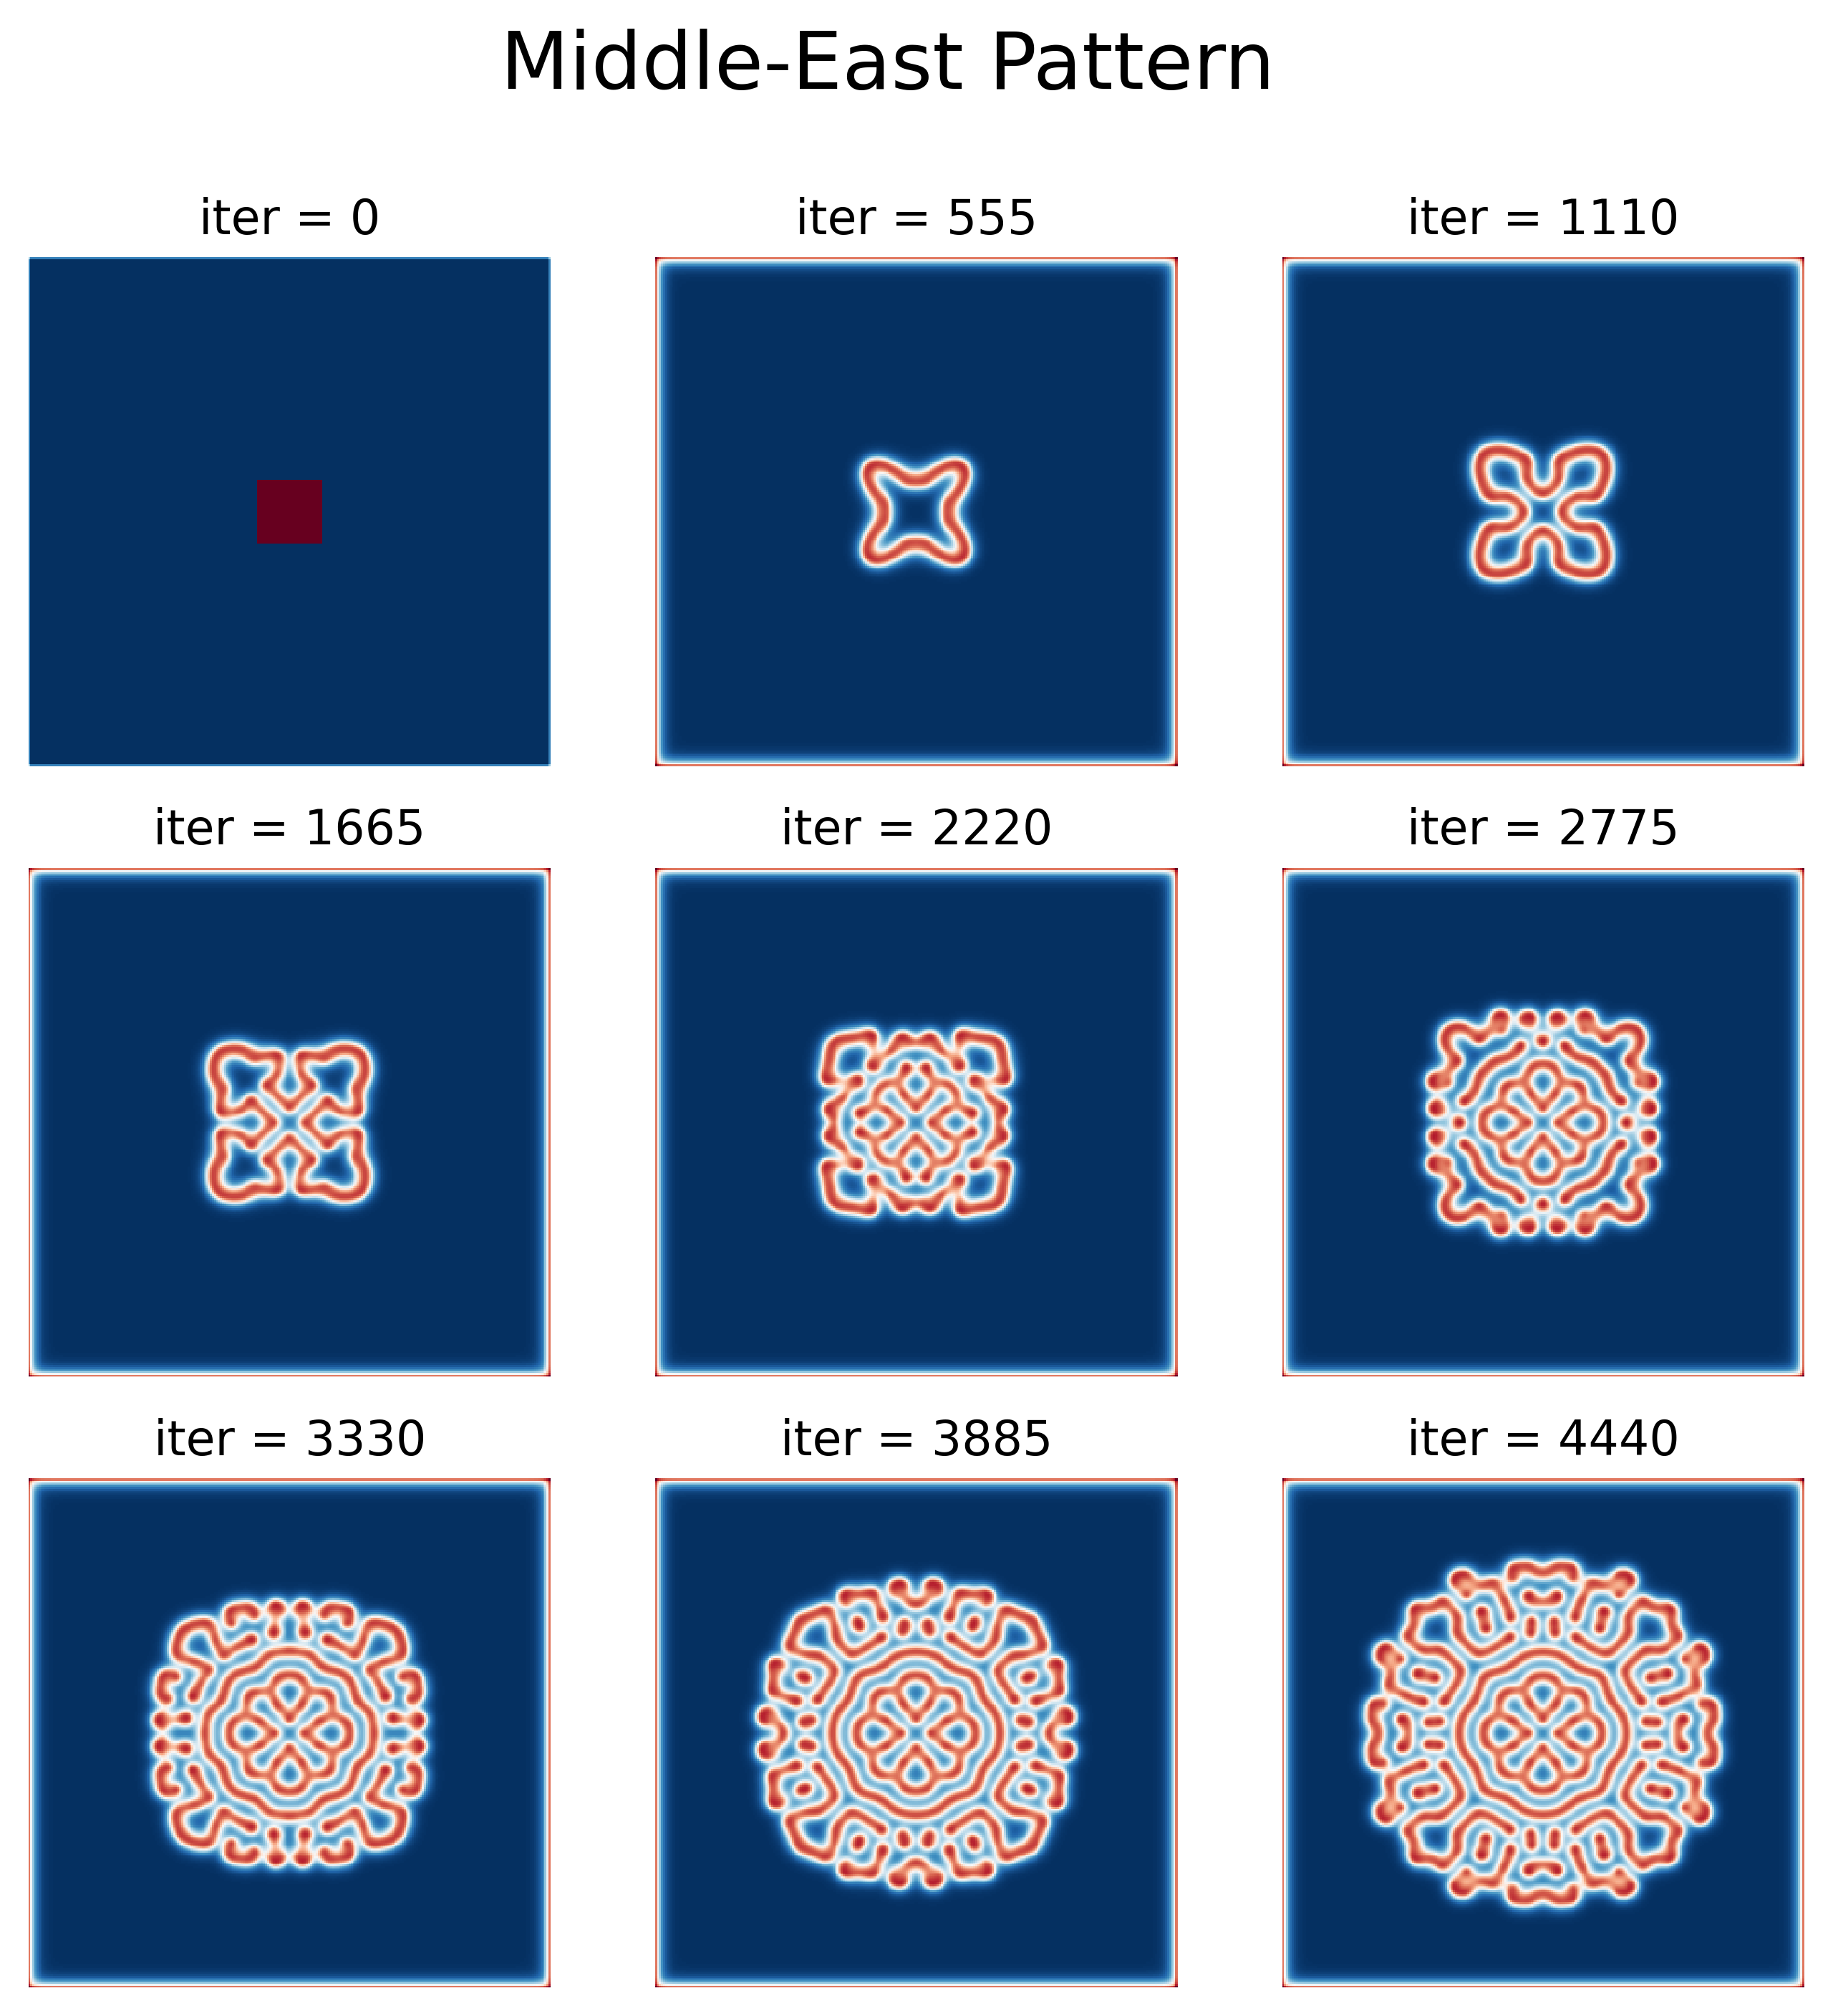

In [9]:
T = 5000     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.16, 0.08, 0.035, 0.060  # Coefficients

fig, axes = plt.subplots(3,3, figsize=(8,8), dpi=400, facecolor='w', edgecolor='k')
step_plot = n // 9

# Simulation part
t1 = time.time()

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    
    # Plot at 9 different times
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        drawPattern(A, ax=ax)
        ax.set_title(f'iter = {i}')
    
fig.suptitle(f'Middle-East Pattern',fontsize=20)
t2 = time.time()

print(f'Simulation time = {t2-t1} seconds')

## Full Pattern Simulation

We also perform simulations to observe the fully developed pattern by increasing the number of iterations.
The settings are the same as before, but we only plot the pattern at the last iteration.

### Cell Division Pattern

Simulation time = 26.8316011428833 seconds


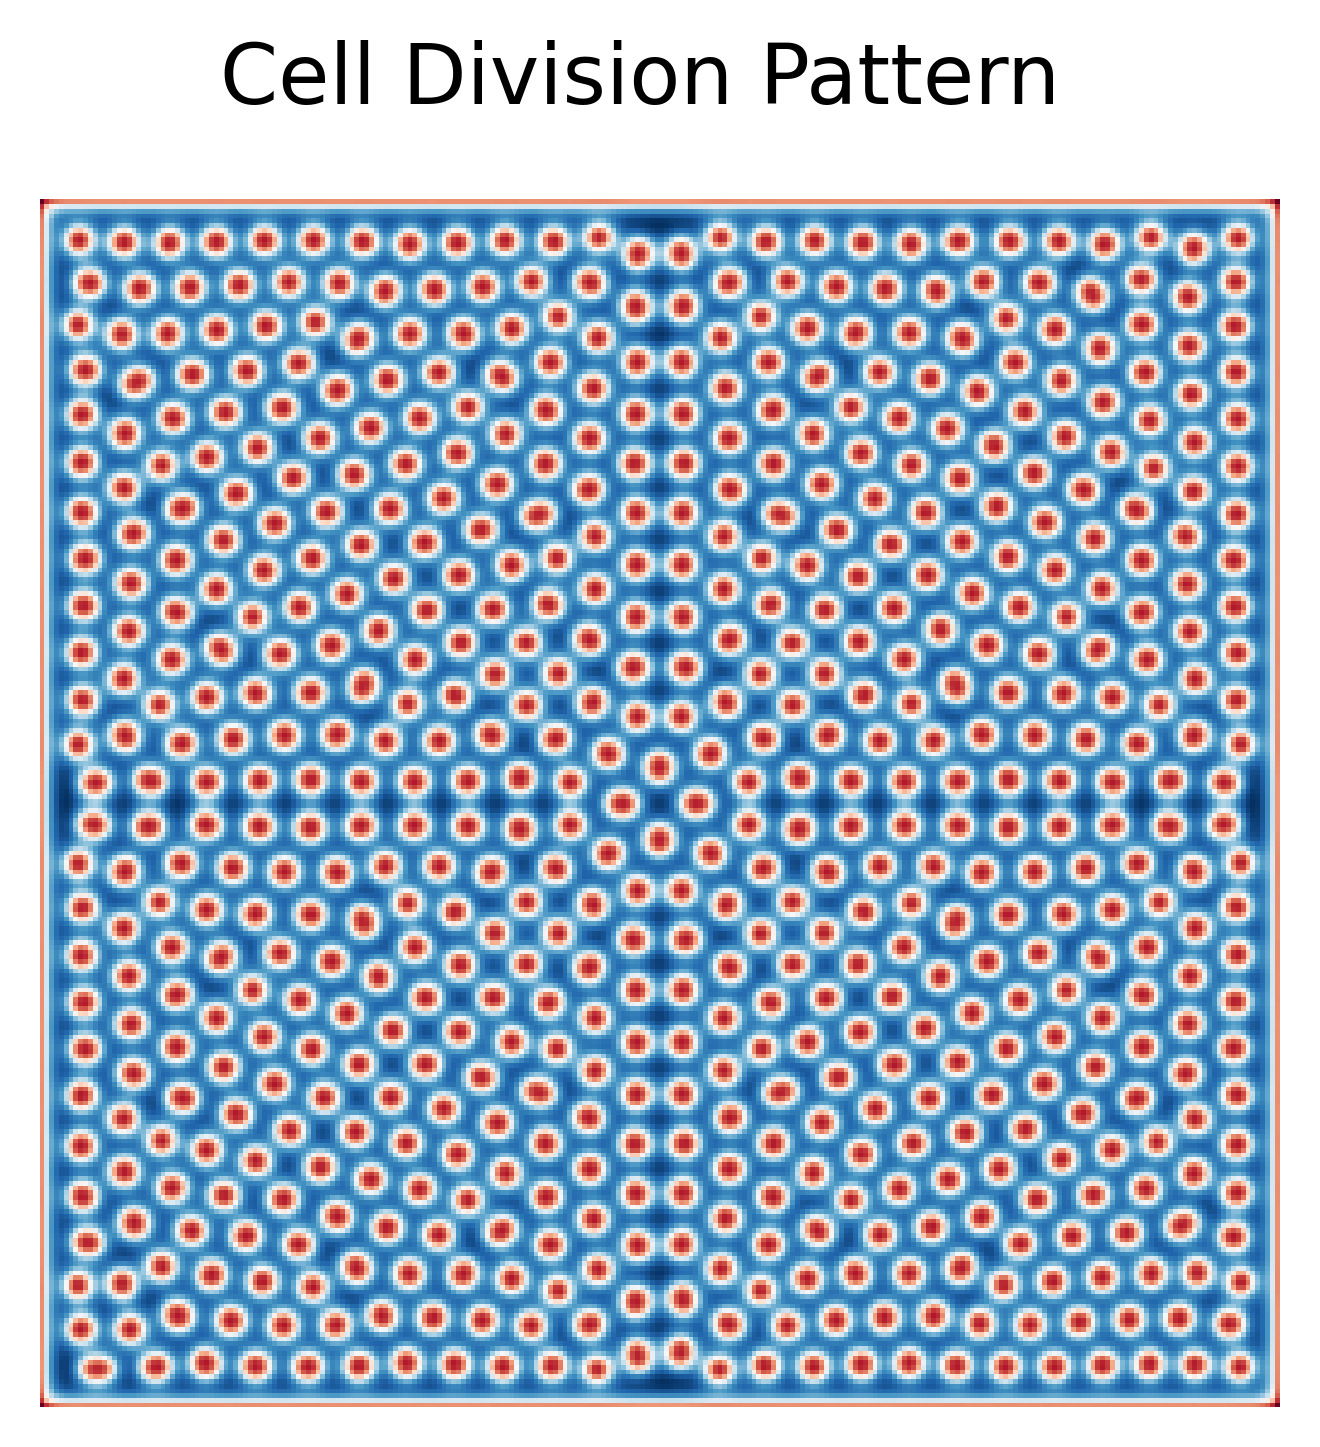

In [10]:
N = 256       # Grid size
T = 3.2e4     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.14, 0.06, 0.035, 0.065  # Coefficients

fig, ax = plt.subplots(1, dpi=400, figsize=(4,4), facecolor='w', edgecolor='k')

# Simulation part
t1 = time.time()

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    
t2 = time.time()

print(f'Simulation time = {t2-t1} seconds')

# Plot at the last iteration
drawPattern(A, ax=ax)
fig.suptitle(f'Cell Division Pattern',fontsize=15);
fig.savefig('../../Figures/Cell_Division_Pattern.png',format='png',dpi=300)

### Coral Pattern

Simulation time = 33.649378061294556 seconds


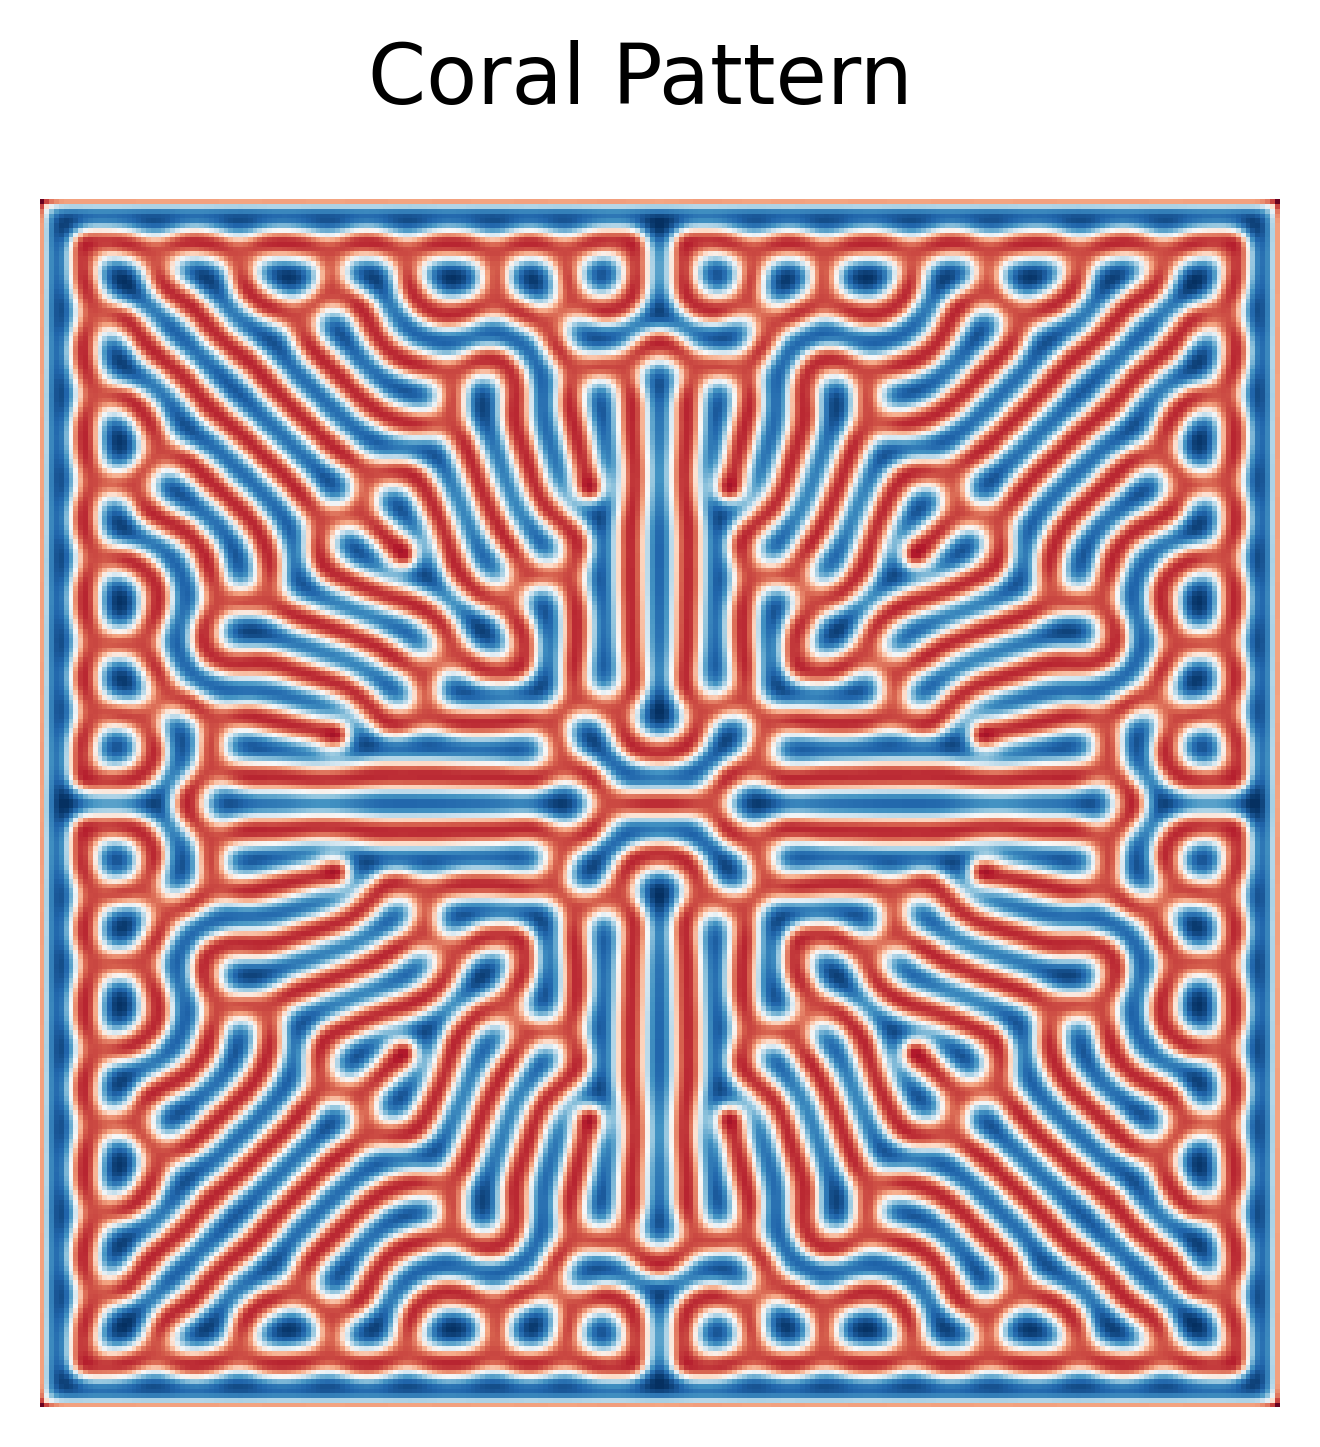

In [11]:
N = 256       # Grid size
T = 3.2e4     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.16, 0.08, 0.060, 0.062  # Coefficients

fig, ax = plt.subplots(1, dpi=400, figsize=(4,4), facecolor='w', edgecolor='k')

# Simulation part
t1 = time.time()

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    
t2 = time.time()

print(f'Simulation time = {t2-t1} seconds')

# Plot at the last iteration
drawPattern(A, ax=ax)
fig.suptitle(f'Coral Pattern',fontsize=15);
fig.savefig('../../Figures/Coral_Pattern.png',format='png',dpi=300)

### Spiral Pattern

Simulation time = 35.31406378746033 seconds


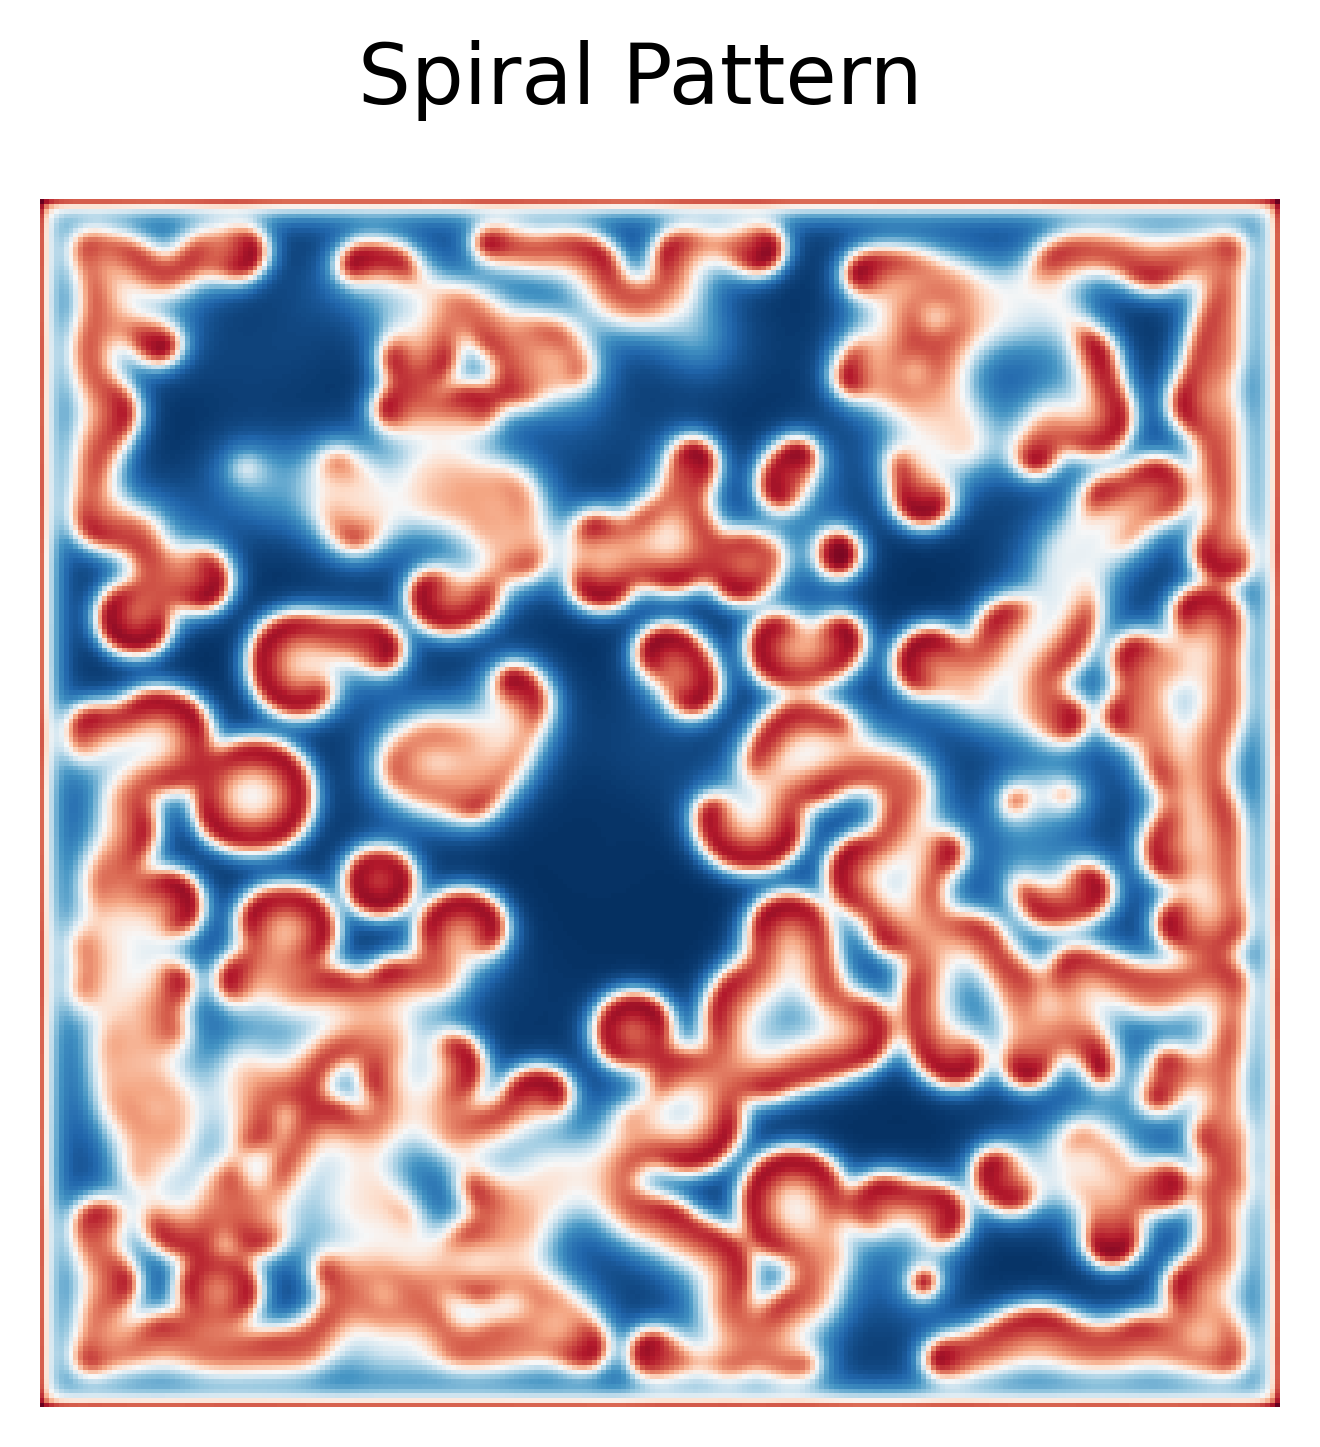

In [12]:
N = 256       # Grid size
T = 3.2e4     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.12, 0.08, 0.020, 0.050  # Coefficients

fig, ax = plt.subplots(1, dpi=400, figsize=(4,4), facecolor='w', edgecolor='k')

# Simulation part
t1 = time.time()

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    
t2 = time.time()

print(f'Simulation time = {t2-t1} seconds')

# Plot at the last iteration
drawPattern(A, ax=ax)
fig.suptitle(f'Spiral Pattern',fontsize=15);
fig.savefig('../../Figures/Spiral_Pattern.png',format='png',dpi=300)

### Middle-East Pattern

Simulation time = 27.606910228729248 seconds


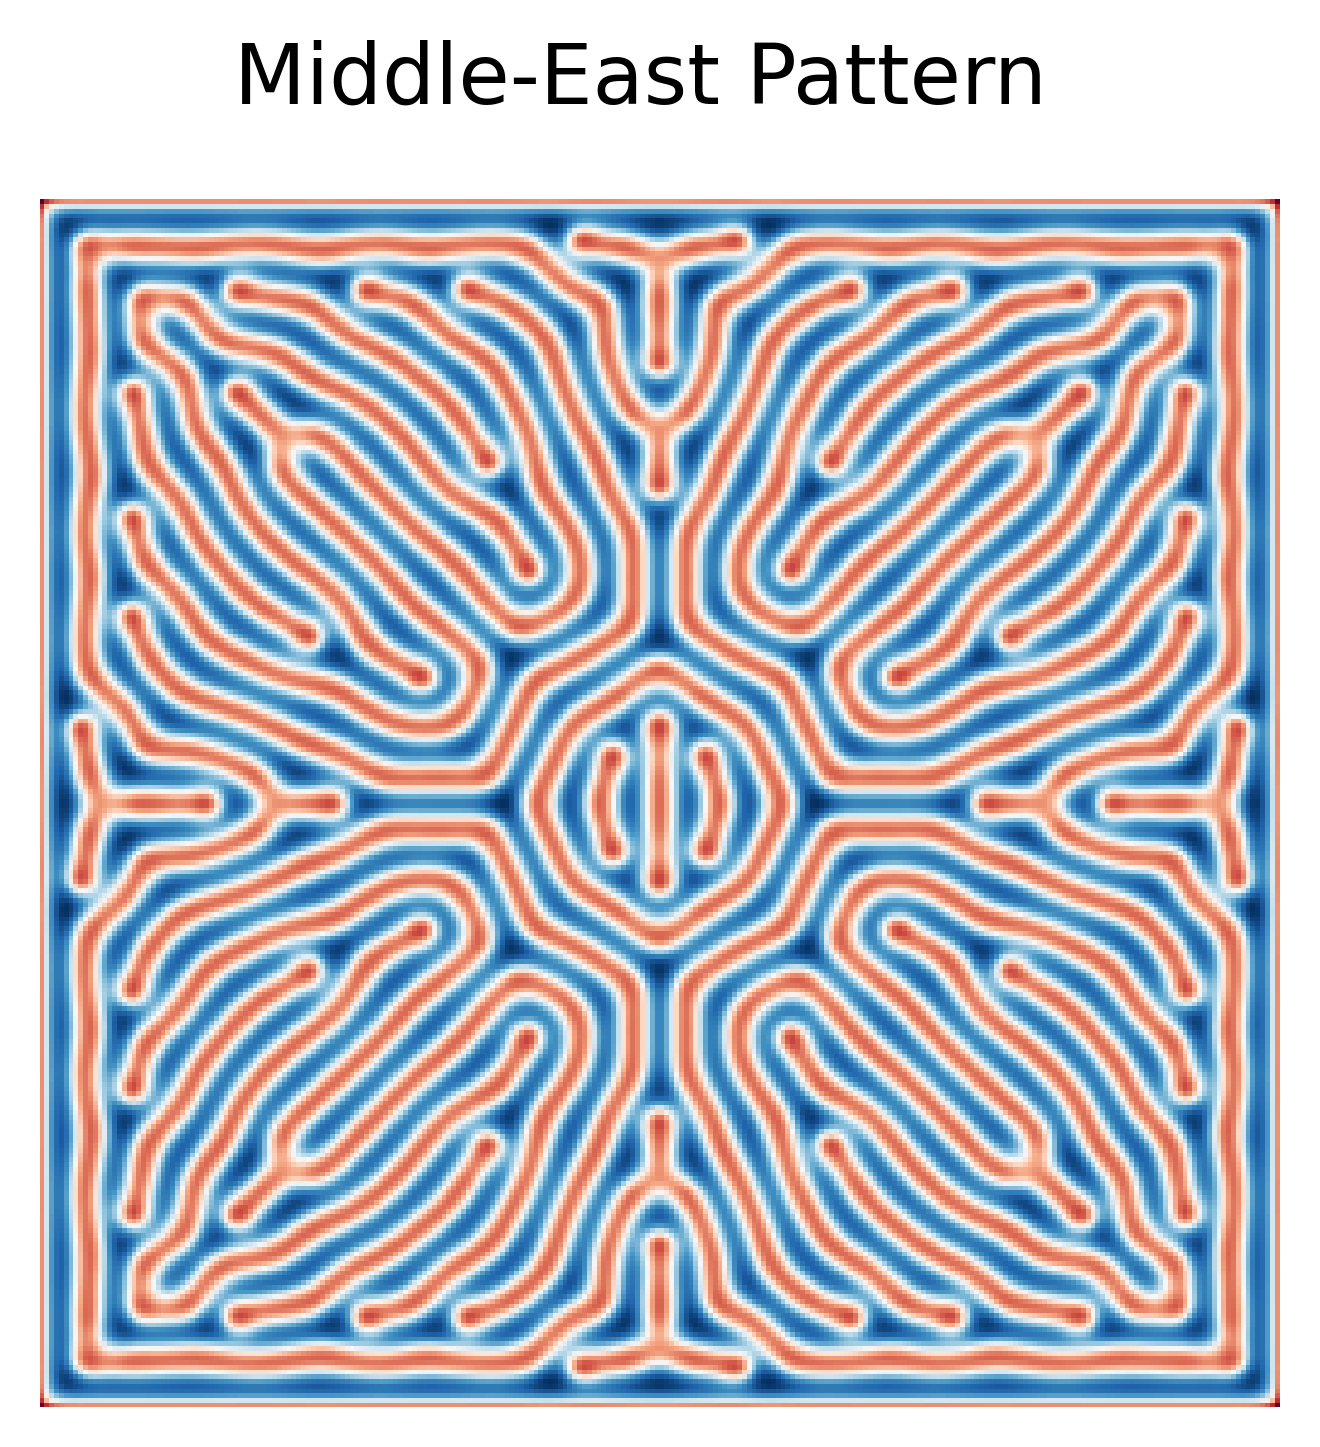

In [13]:
N = 256       # Grid size
T = 3.2e4     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.16, 0.08, 0.035, 0.060  # Coefficients

fig, ax = plt.subplots(1, dpi=400, figsize=(4,4), facecolor='w', edgecolor='k')

# Simulation part
t1 = time.time()

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    
t2 = time.time()

print(f'Simulation time = {t2-t1} seconds')

# Plot at the last iteration
drawPattern(A, ax=ax)
fig.suptitle(f'Middle-East Pattern',fontsize=15);
fig.savefig('../../Figures/MiddleEast_Pattern.png',format='png',dpi=300)

### Initial pattern for all simulations

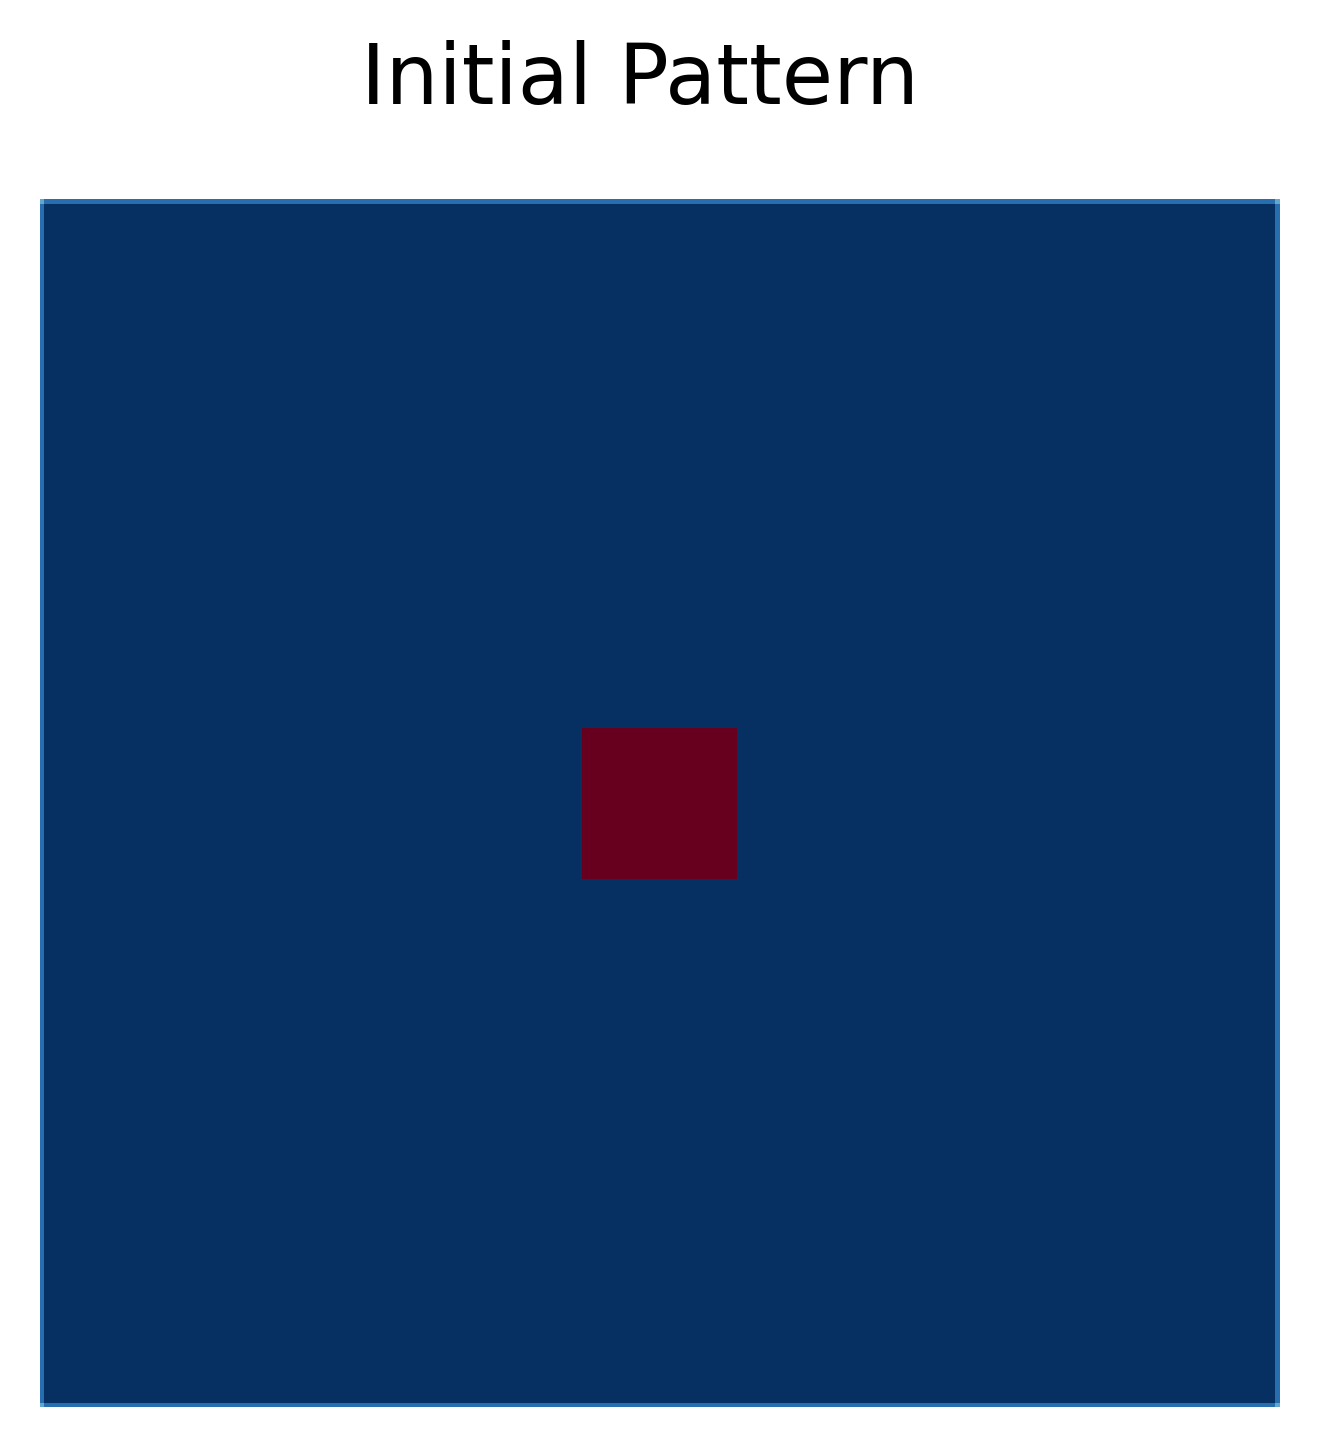

In [14]:
N = 256       # Grid size
T = 3.2e4     # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
Da, Db, F, K = 0.12, 0.08, 0.020, 0.050  # Coefficients

A, B = initialize(N)
L = laplacian(N)

A, B = update(A, B, dT, Da, Db, F, K, L)

fig, ax = plt.subplots(1, dpi=400, figsize=(4,4), facecolor='w', edgecolor='k')

drawPattern(A, ax=ax)

fig.suptitle('Initial Pattern',fontsize=15);

fig.savefig('../../Figures/Initial_Pattern.png',format='png',dpi=300)

### Rendering the simulation

We also render the pattern growth simulation and export it as a GIF.

In [79]:
N = 256 # Grid size
T = 5000 # Total time
dT = 1.0      # Time step
n = int(T/dT) # Number of iterations
nSeconds = 10  # video duration
fps = int((n/10)/nSeconds) # frames per second
Da, Db, F, K = 0.14, 0.06, 0.035, 0.065  # Coefficients

A_list = []
B_list = []

A, B = initialize(N)
L = laplacian(N)

for i in range(n):
    # Iteration update
    A, B = update(A, B, dT, Da, Db, F, K, L)
    if i % 10 == 0: # save every 10 iteration
        A_list.append(A)
        B_list.append(B)        

# Plotting animation
fig, ax = plt.subplots(figsize=(4,4), facecolor='w', edgecolor='k')
fig.suptitle(f'Cell Division Pattern',fontsize=10)

def animateFunc(i):
    print(i)
    drawPattern(A_list[i], ax=ax)
    ax.set_title(f'iter = {i}')
    
anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1 # in ms
                              )

writer = animation.PillowWriter(fps=fps)

t1 = time.time()
anim.save("cell_division_pattern_growth.gif", dpi=150, writer=writer)
t2 = time.time()

print(f'Rendering time = {t2-t1} s')

# anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

# print('Done!')

500